# AI 아키텍트 양성과정 - 미니 프로젝트(파이썬으로 간단한 분석 해보기)

### 주제 : 지하철역별 유동인구와 역 주변 상권을 분석하여 최적의 판매위치 찾기

1. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #matplotlib중 pyplot이 그래프를 그리는 모듈
%matplotlib inline 
#그래프 결과를 출력 세션에 나오게 하는 설정
import platform
path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

2. 데이터 전처리

In [24]:
# 2-0 데이터 불러오기

df = pd.read_excel("1911_교통카드_통계자료_하차2.xls",encoding='euc-kr')
df.shape

(597, 25)

In [25]:
# 2-1 대상 지역을 서울시 중구로 정했으므로 중구에 해당하는 지하철역만 필터링

df2 = df[df['지하철역'].isin(['서울역', '서대문', '시청', '을지로입구', '명동', '을지로4가', '을지로3가', '회현(남대문시장)', '약수', '동대문역사문화공원', '동대입구', '신당', '버티고개', '충무로'])]
df2.shape

(27, 25)

In [26]:
# 2-2 필터링한 지하철역은 15개인데 행 개수가 27개인 것을 확인
# 데이터를 확인해보니 호선만 다르고 지하철역 이름은 같아서 중복된 행이 있었음
# -> 동일한 지하철 역은 유동인구수를 합쳐서 보기로함

df2['지하철역'].value_counts()

서울역          6
동대문역사문화공원    3
충무로          2
을지로4가        2
을지로3가        2
약수           2
시청           2
신당           2
명동           1
동대입구         1
버티고개         1
회현(남대문시장)    1
서대문          1
을지로입구        1
Name: 지하철역, dtype: int64

In [27]:
# 2-3 지하철역 이름을 그룹화하여 합계를 구하고 데이터를 저장후 다시 불러옴
df3 = df2.groupby(df2['지하철역']).sum()
df3.to_excel('./역별합계_하차.xlsx', encoding='euc-kr')

In [28]:
df3.head()

,4,5,6,7,8,9,10,11,12,13,...,18,19,20,21,22,23,24,1,2,3
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문역사문화공원,9,3198,25452,65189,189285,113411,81289,75110,75389,83722,...,88870,103398,66689,50019,39996,27993,9285,258,0,0
동대입구,3,1307,8139,22347,77911,48647,48755,40232,28730,32796,...,28386,13674,7727,6628,5540,4101,1567,127,0,0
명동,1,1360,17000,53503,144486,110757,75301,83900,90371,90821,...,91405,64550,41438,30312,19188,11853,3737,165,0,0
버티고개,0,271,1573,2868,5870,3597,2651,2359,2492,3170,...,7389,6277,4072,3733,3937,3003,820,0,0,0
서대문,1,1628,21302,52803,164939,58763,28057,24009,24114,28177,...,33221,19934,12297,11961,10645,6313,1906,53,0,0


In [29]:
df3 = pd.read_excel('./역별합계_하차2.xlsx', encoding='euc-kr')

In [30]:
df3.shape

(14, 25)

In [31]:
df3['지하철역'].value_counts()  # 중복값이 없는 것을 확인

명동           1
시청           1
동대문역사문화공원    1
충무로          1
을지로입구        1
을지로4가        1
버티고개         1
회현(남대문시장)    1
을지로3가        1
서대문          1
약수           1
신당           1
동대입구         1
서울역          1
Name: 지하철역, dtype: int64

In [32]:
df3.shape # 역 개수가 14개인 것을 확인

(14, 25)

In [92]:
df3 = df3.iloc[:, :14]

3. 역별, 시간대별 유동인구수 확인

In [33]:
# 3-1 그래프를 그리기 위해 DataFrame을 rotate 후에 저장
df4 = df3.T
df4.to_excel('./회전_최종.xlsx', encoding='euc-kr')

# 저장후 첫번째 행에 기존 인덱스 들어간거 지워주고
# 그래프 그릴때 앞쪽에 작은 수가 가야 이쁘게 나와서 시간 순서만 엑셀로 편집함 (기존 04시 ~ 01시 순서를 00시~ 23시 순으로 바꿈)

In [94]:
# 다시 불러오고 확인
df4 = pd.read_excel('./회전_최종2.xlsx', encoding='euc-kr') #엑셀 수정후 최종2로 이름 바꿈
df4.shape

(13, 15)

In [95]:
# 3-2 인덱스를 시간컬럼으로 변경 -> 이렇게해야 표만들때 시간 컬럼은 제외됨
df5 = df4.set_index('시간')

In [97]:
df5.shape

(13, 14)

([<matplotlib.axis.XTick at 0x1f6a97e59c8>,
 <a list of 13 Text xticklabel objects>)

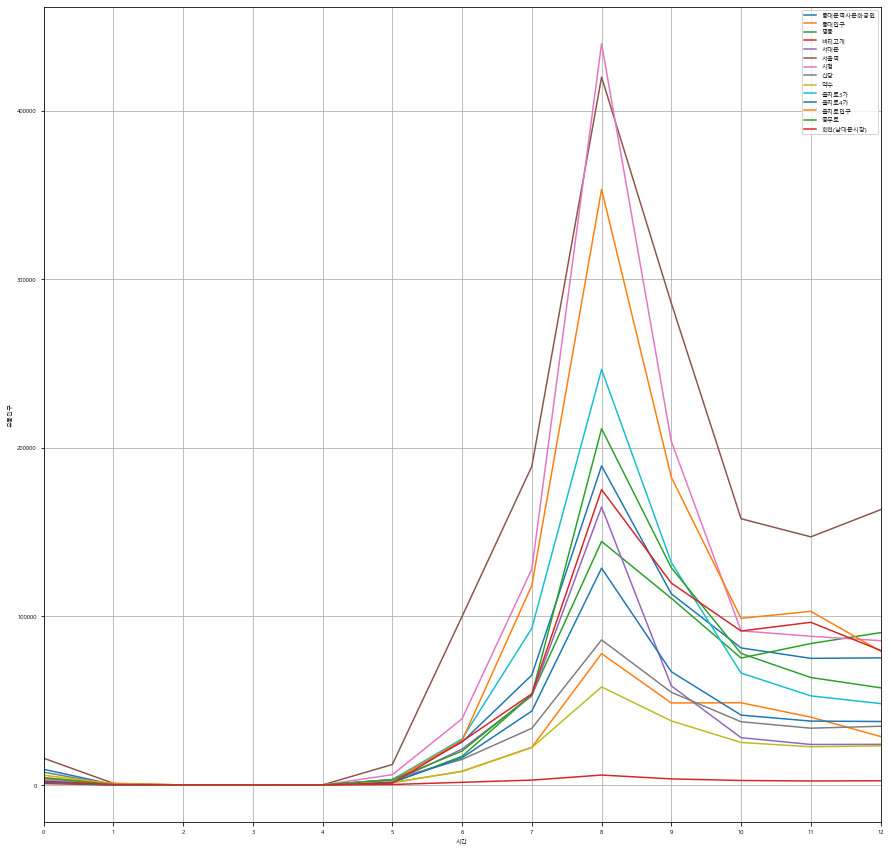

In [98]:
# 3-3 그래프 그려보기 
plt.rc('font', family='Malgun Gothic', size =6)
df5.plot(grid=True, figsize=(15,15)) # 전체 그래프 그리는건 시간이 인덱스인걸로 설정
plt.ylabel('유동인구')
plt.xticks(df4['시간']) #x축 눈금 설정 #시간이 인덱스가 아닌 파일에서 x축으로 설정

([<matplotlib.axis.XTick at 0x1f6a97dd9c8>,
 <a list of 13 Text xticklabel objects>)

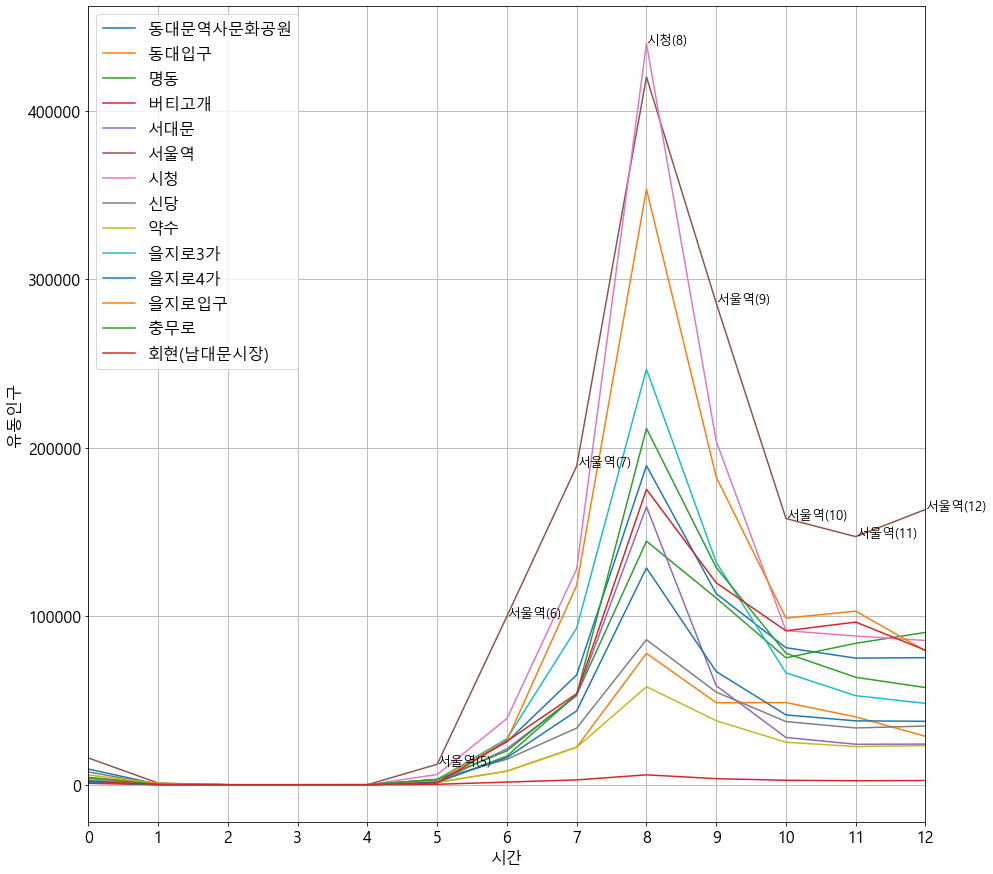

In [100]:
# 3-4 각 시간대별 어떤 역이 1위인지 확인하기 힘들어서 텍스트를 추가함

# x축 좌표 = i   (df3에서 시간대별 컬럼명을 의미)
# y축 = df3[i].max()    (df3에서 시간대별 맥스치 값을 의미)
# T =list(df3['지하철역'][df3[i]==df3[i].max()]) 
# T[0]  지하철역 컬럼에서 i 시간의 값이 맥스값인 행을 출력하고 그걸 리스트로 바꾼뒤 값만 출력
plt.rc('font', family='Malgun Gothic', size =16)
df5.plot(grid=True, figsize=(15,15))
plt.ylabel('유동인구')
for i in range(5, 13):
    T = list(df3['지하철역'][df3[i]==df3[i].max()])
    plt.text(i, df3[i].max(), '{0}({1})'.format(T[0],i), fontsize='13') # (x좌표, y좌표, 출력텍스트, 사이즈)
plt.xticks(df4['시간']) #x축 눈금 설정

In [127]:
# 3-5 승차 인원도 같은 방식으로 진행 

dfs = pd.read_excel('./1911_교통카드_통계자료_승차2.xls', encoding='euc-kr')
dfs.head()

,지하철역,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,서울역,2,0,0,1019,11590,14391,42971,87305,67678,...,118199,123372,173386,256149,138349,97617,97623,71535,34270,3959
1,시청,1,0,0,78,2305,3912,8160,10751,13525,...,57429,70921,91667,170360,74106,60743,61804,40170,14929,917
2,종각,0,0,0,99,4307,4480,7318,12414,15581,...,81845,94418,146602,248103,121851,105922,124509,100457,45860,3847
3,종로3가,6,0,0,187,5307,4617,6657,11028,15803,...,85615,95877,101394,122185,84314,64827,72171,61122,26081,3031
4,종로5가,0,0,0,39,2195,3118,5783,9742,13901,...,72326,77039,95767,124043,67845,45822,39951,31979,10796,827


In [128]:
dfs2 = dfs[dfs['지하철역'].isin(['서울역', '서대문', '시청', '을지로입구', '명동', '을지로4가', '을지로3가', '회현(남대문시장)', '약수', '동대문역사문화공원', '동대입구', '신당', '버티고개', '충무로'])]
dfs2.shape

(27, 25)

In [129]:
dfs2['지하철역'].value_counts()

서울역          6
동대문역사문화공원    3
충무로          2
을지로4가        2
을지로3가        2
약수           2
시청           2
신당           2
명동           1
동대입구         1
버티고개         1
회현(남대문시장)    1
서대문          1
을지로입구        1
Name: 지하철역, dtype: int64

In [130]:
# 데이터중 유동인구 값이 전부 숫자여야되는데 천자리 이상 숫자는 사이에 콤마가 들어가서 문자(object)로 되어있음
dfs2.dtypes

지하철역    object
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
dtype: object

In [50]:
# 원본데이터에서 수정후 다시 불러옴

In [131]:
dfs2= dfs2.groupby(dfs2['지하철역']).sum()

In [132]:
dfs2.shape

(14, 24)

In [133]:
# 앞에 인덱스 붙일겸 저장하고 다시 불러옴
dfs2.to_excel('./역별합계_승차.xlsx', encoding='euc-kr')

In [147]:
dfs2 = pd.read_excel('./역별합계_승차2.xlsx', encoding='euc-kr')

In [135]:
dfs2.shape

(14, 25)

In [56]:
dfs2.head()

,지하철역,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,동대문역사문화공원,8502,14,2,0,646,22639,13880,19897,33274,...,75194,93474,108542,139857,192329,113640,85256,81450,75276,47445
1,동대입구,895,1,0,0,16,1775,2762,5862,9923,...,24250,28784,34610,53153,57290,32165,39052,30018,20848,7330
2,명동,2662,2,0,0,47,1664,3954,6986,15425,...,65914,81519,93765,111332,159787,106689,96943,103048,95856,40144
3,버티고개,143,0,0,0,4,980,2143,5641,9425,...,3280,3876,3941,5416,6946,3835,2717,2161,1793,859
4,서대문,886,1,0,0,12,2996,6448,18532,25821,...,26823,34117,46523,64818,124305,38223,27987,26983,19081,7678


In [136]:
# 그래프를 그리기 위해 DataFrame을 rotate 후에 저장
dfs3 = dfs2.T
dfs3.to_excel('./회전_최종_승차.xlsx', encoding='euc-kr')

# 저장후 첫번째 행에 기존 인덱스 들어간거 지워주고
# 그래프 그릴때 앞쪽에 작은 수가 가야 이쁘게 나와서 시간 순서만 엑셀로 편집함 (기존 04시 ~ 01시 순서를 00시~ 23시 순으로 바꿈)

In [137]:
dfs3 = pd.read_excel('회전_최종_승차2.xlsx', encoding='euc-kr')
dfs3.head()

,시간,동대문역사문화공원,동대입구,명동,버티고개,서대문,서울역,시청,신당,약수,을지로3가,을지로4가,을지로입구,충무로,회현(남대문시장)
0,0,8502,895,2662,143,886,6087,2886,2462,1565,5536,1462,4527,6509,929
1,1,14,1,2,0,1,9,5,6,4,16,5,2,2,0
2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,646,16,47,4,12,1359,135,144,131,13,13,123,83,54


In [138]:
# 인덱스를 시간컬럼으로 변경 -> 이렇게해야 표만들때 시간 컬럼은 제외됨
dfs4 = dfs3.set_index('시간')

([<matplotlib.axis.XTick at 0x1f6aa42e188>,
 <a list of 13 Text xticklabel objects>)

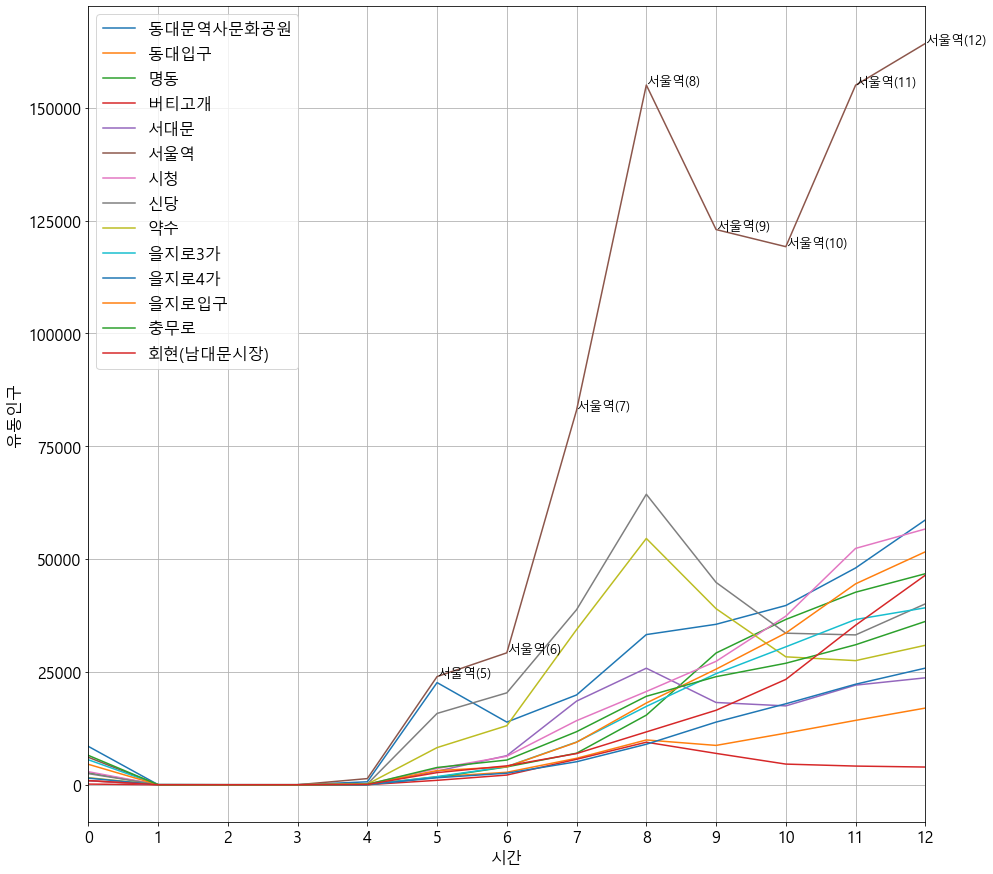

In [139]:
plt.rc('font', family='Malgun Gothic', size =16)
dfs4.plot(grid=True, figsize=(15,15))
plt.ylabel('유동인구')
for i in range(5, 13):
    TS = list(dfs2['지하철역'][dfs2[i]==dfs2[i].max()])
    plt.text(i, dfs2[i].max(), '{0}({1})'.format(TS[0],i), fontsize='13') # (x좌표, y좌표, 출력텍스트, 사이즈)
plt.xticks(dfs3['시간']) #x축 눈금 설정

4. 주변 상권 분석

In [2]:
from math import radians, cos, sin, asin, sqrt

In [3]:
station = pd.read_excel('중구_지하철역정보.xlsx')
station.head()

,지하철역,주소,위도,경도,개수,가게수,특이사항
0,서울역,서울특별시 중구 한강대로,37.555127,126.970550,6,NaN,NaN
1,동대문역사문화공원,서울특별시 중구 을지로7가,37.565383,127.008847,3,NaN,NaN
2,충무로,서울특별시 중구 필동2가,37.561093,126.993700,2,NaN,NaN
3,을지로3가,서울특별시 중구 을지로3가,37.566175,126.991924,2,NaN,NaN
4,신당,서울특별시 중구 황학동 퇴계로,37.565500,127.018853,2,NaN,NaN


In [4]:
store = pd.read_csv('상가업소_중구_02.csv')
store.head()

,상호명,상권업종중분류명,위도,경도
0,피자마루,패스트푸드,37.552153,127.010861
1,황생칼국수,분식,37.559810,126.983052
2,피자,패스트푸드,37.549451,127.007762
3,샘,음식배달서비스,37.565539,127.002874
4,현대,분식,37.562901,126.976864


In [7]:
# 위도, 경도 좌표로 거리 구하는 함수
# latitude : 위도, 가로선 / longitude : 경도, 세로선

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    지구의 두점 사이의 거리를 계산
    """
    # convert decimal degrees to radians  # 10진수를 radian 으로 변환
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula  공식
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c2 = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles 킬로미터단위의 지구반경
    return c2 * r
    #return 1;

# lat1 = station["위도"][0]
# lon1 = station["경도"][0]

In [8]:
from tqdm import tqdm_notebook
from time import sleep

In [9]:
# 200m 반경내 가게수

i = 0 
cnt = 0
radius = 0.2 # in kilometer

station_set = tqdm_notebook(station.values) # 진행률 확인?
station_index = 0;

for i in station_set:
    
    store_count = 0
    lat1 = station["위도"][station_index]
    lon1 = station["경도"][station_index]
    
    loop = store.values
    store_index = 0
    
    for char in loop :
        lat2 = store.values[store_index][2]
        lon2 = store.values[store_index][3]
        store_index += 1
        
        check = haversine(lon1, lat1, lon2, lat2)

        if check <= radius:
            store_count += 1
        
    station.가게수.values[station_index] = store_count
    station_index += 1

In [10]:
station[['지하철역', '가게수']]

,지하철역,가게수
0,서울역,9.0
1,동대문역사문화공원,5.0
2,충무로,24.0
3,을지로3가,20.0
4,신당,31.0
5,약수,52.0
6,을지로4가,4.0
7,시청,11.0
8,동대입구,3.0
9,버티고개,12.0


In [11]:
station.to_excel('가게수.xlsx')

In [12]:
station2 = station.set_index('지하철역')

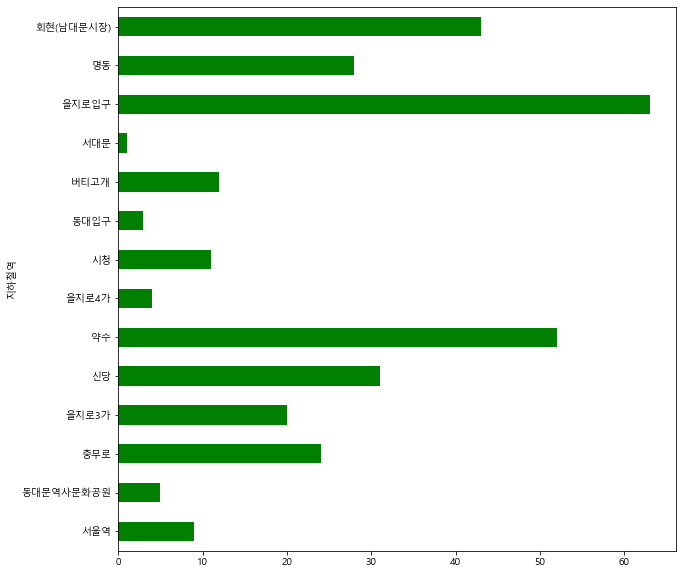

In [13]:
station2['가게수'].plot(kind='barh', figsize=(10,10), color='green')

5. 가중치 적용하여 입지 점수 내보기

In [149]:
# 5-1 입지 점수 : 
#(승차인원 / (아침을 거른사람 비율*그냥 지하철 타려는사람)(4))  + (하차인원 / 아침을 거른사람 비율(2))  / (가게수*20)
# result 뽑기 

df7 = df3.set_index('지하철역') # 하차 유동인구
dfs7 = dfs2.set_index('지하철역') # 승차 유동인구

In [148]:
dfs2

,지하철역,0,1,2,3,4,5,6,7,8,9,10,11,12
0,동대문역사문화공원,8502,14,2,0,646,22639,13880,19897,33274,35554,39718,48037,58678
1,동대입구,895,1,0,0,16,1775,2762,5862,9923,8715,11433,14261,16989
2,명동,2662,2,0,0,47,1664,3954,6986,15425,29189,36631,42663,46761
3,버티고개,143,0,0,0,4,980,2143,5641,9425,6944,4574,4135,3921
4,서대문,886,1,0,0,12,2996,6448,18532,25821,18226,17472,22071,23690
5,서울역,6087,9,0,0,1359,23967,29234,83005,155066,123032,119236,155019,164270
6,시청,2886,5,1,0,135,3591,6305,14200,20661,27347,37360,52373,56674
7,신당,2462,6,0,0,144,15800,20363,38795,64368,44837,33583,33202,40085
8,약수,1565,4,0,0,131,8231,13088,34384,54580,39013,28346,27503,30901
9,을지로3가,5536,16,0,0,13,1799,4022,9460,17357,24619,30564,36616,39208


In [159]:
result = (dfs7.values/4)+ (df7.values/2)
result= pd.DataFrame(result)


result = pd.concat([df3['지하철역'],result], axis=1)
result

,지하철역,0,1,2,3,4,5,6,7,8,9,10,11,12
0,동대문역사문화공원,6768.00,132.50,0.50,0.0,166.00,7258.75,16196.00,37568.75,102961.00,65594.00,50574.00,49564.25,52364.00
1,동대입구,1007.25,63.75,0.00,0.0,5.50,1097.25,4760.00,12639.00,41436.25,26502.25,27235.75,23681.25,18612.25
2,명동,2534.00,83.00,0.00,0.0,12.25,1096.00,9488.50,28498.00,76099.25,62675.75,46808.25,52615.75,56875.75
3,버티고개,445.75,0.00,0.00,0.0,1.00,380.50,1322.25,2844.25,5291.25,3534.50,2469.00,2213.25,2226.25
4,서대문,1174.50,26.75,0.00,0.0,3.50,1563.00,12263.00,31034.50,88924.75,33938.00,18396.50,17522.25,17979.50
5,서울역,9455.75,483.25,0.00,0.0,356.25,12056.75,57300.50,115284.75,248736.00,173661.50,108777.50,112350.25,122716.00
6,시청,2349.00,82.75,0.75,0.0,35.25,3929.25,21196.25,67596.50,225053.25,108776.25,55052.00,57196.75,56964.50
7,신당,4409.00,58.50,0.00,0.0,36.50,5528.00,12669.75,26505.25,59112.50,38701.75,27141.75,25139.00,27435.25
8,약수,3279.25,392.00,0.00,0.0,34.25,2808.75,7252.00,19696.50,42722.00,28750.75,19688.00,18200.25,19336.75
9,을지로3가,2664.50,53.50,0.50,0.0,3.75,2012.75,14671.00,48854.50,127594.25,72149.75,40834.50,35573.50,33938.00


In [151]:
station = pd.read_excel('가게수.xlsx', encoding='euc-kr')
sta=station[['지하철역', '가게수']]
sta1 = pd.DataFrame(sta)
sta1
store = pd.merge(result, sta1, on='지하철역')

In [154]:
store

,지하철역,0,1,2,3,4,5,6,7,8,9,10,11,12,가게수
0,동대문역사문화공원,6768.00,132.50,0.50,0.0,166.00,7258.75,16196.00,37568.75,102961.00,65594.00,50574.00,49564.25,52364.00,5
1,동대입구,1007.25,63.75,0.00,0.0,5.50,1097.25,4760.00,12639.00,41436.25,26502.25,27235.75,23681.25,18612.25,3
2,명동,2534.00,83.00,0.00,0.0,12.25,1096.00,9488.50,28498.00,76099.25,62675.75,46808.25,52615.75,56875.75,28
3,버티고개,445.75,0.00,0.00,0.0,1.00,380.50,1322.25,2844.25,5291.25,3534.50,2469.00,2213.25,2226.25,12
4,서대문,1174.50,26.75,0.00,0.0,3.50,1563.00,12263.00,31034.50,88924.75,33938.00,18396.50,17522.25,17979.50,1
5,서울역,9455.75,483.25,0.00,0.0,356.25,12056.75,57300.50,115284.75,248736.00,173661.50,108777.50,112350.25,122716.00,9
6,시청,2349.00,82.75,0.75,0.0,35.25,3929.25,21196.25,67596.50,225053.25,108776.25,55052.00,57196.75,56964.50,11
7,신당,4409.00,58.50,0.00,0.0,36.50,5528.00,12669.75,26505.25,59112.50,38701.75,27141.75,25139.00,27435.25,31
8,약수,3279.25,392.00,0.00,0.0,34.25,2808.75,7252.00,19696.50,42722.00,28750.75,19688.00,18200.25,19336.75,52
9,을지로3가,2664.50,53.50,0.50,0.0,3.75,2012.75,14671.00,48854.50,127594.25,72149.75,40834.50,35573.50,33938.00,20


In [160]:
# station = pd.read_excel('가게수.xlsx', encoding='euc-kr')
# station['가게수']

for i in range(13):
    result[i] = result[i]/(store['가게수']*20)
result

,지하철역,0,1,2,3,4,5,6,7,8,9,10,11,12
0,동대문역사문화공원,67.680000,1.325000,0.005000,0.0,1.660000,72.587500,161.960000,375.687500,1029.610000,655.940000,505.740000,495.642500,523.640000
1,동대입구,16.787500,1.062500,0.000000,0.0,0.091667,18.287500,79.333333,210.650000,690.604167,441.704167,453.929167,394.687500,310.204167
2,명동,4.525000,0.148214,0.000000,0.0,0.021875,1.957143,16.943750,50.889286,135.891518,111.920982,83.586161,93.956696,101.563839
3,버티고개,1.857292,0.000000,0.000000,0.0,0.004167,1.585417,5.509375,11.851042,22.046875,14.727083,10.287500,9.221875,9.276042
4,서대문,58.725000,1.337500,0.000000,0.0,0.175000,78.150000,613.150000,1551.725000,4446.237500,1696.900000,919.825000,876.112500,898.975000
5,서울역,52.531944,2.684722,0.000000,0.0,1.979167,66.981944,318.336111,640.470833,1381.866667,964.786111,604.319444,624.168056,681.755556
6,시청,10.677273,0.376136,0.003409,0.0,0.160227,17.860227,96.346591,307.256818,1022.969318,494.437500,250.236364,259.985227,258.929545
7,신당,7.111290,0.094355,0.000000,0.0,0.058871,8.916129,20.435081,42.750403,95.342742,62.422177,43.777016,40.546774,44.250403
8,약수,3.153125,0.376923,0.000000,0.0,0.032933,2.700721,6.973077,18.938942,41.078846,27.644952,18.930769,17.500240,18.593029
9,을지로3가,6.661250,0.133750,0.001250,0.0,0.009375,5.031875,36.677500,122.136250,318.985625,180.374375,102.086250,88.933750,84.845000


In [ ]:
# plt.rc('font', family='Malgun Gothic', size =16)
# df_test5.plot(grid=True, figsize=(15,15))
# plt.ylabel('입지점수')
# for i in range(5, 24):
#     T = list(df_test['지하철역'][df_test[i]==df_test[i].max()])
#     plt.text(i, df_test[i].max(), '{0}({1})'.format(T[0],i), fontsize='13') # (x좌표, y좌표, 출력텍스트, 사이즈)
# plt.xticks(df_test4['시간']) #x축 눈금 설정

In [163]:
result2 = result.T

In [164]:
result2.to_excel('최종결과2.xlsx', encoding='euc-kr')

In [165]:
result3 = pd.read_excel('최종결과3.xlsx', encoding='euc-kr')

In [166]:
result3

,시간,동대문역사문화공원,동대입구,명동,버티고개,서대문,서울역,시청,신당,약수,을지로3가,을지로4가,을지로입구,충무로,회현(남대문시장)
0,0,67.6800,16.787500,4.525000,1.857292,58.7250,52.531944,10.677273,7.111290,3.153125,6.661250,14.237500,2.628373,7.851562,1.528779
1,1,1.3250,1.062500,0.148214,0.000000,1.3375,2.684722,0.376136,0.094355,0.376923,0.133750,0.465625,0.286508,0.146875,0.101744
2,2,0.0050,0.000000,0.000000,0.000000,0.0000,0.000000,0.003409,0.000000,0.000000,0.001250,0.000000,0.000794,0.000000,0.000000
3,3,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,1.6600,0.091667,0.021875,0.004167,0.1750,1.979167,0.160227,0.058871,0.032933,0.009375,0.040625,0.024405,0.045312,0.019186
5,5,72.5875,18.287500,1.957143,1.585417,78.1500,66.981944,17.860227,8.916129,2.700721,5.031875,14.940625,1.688492,5.184896,1.405233
6,6,161.9600,79.333333,16.943750,5.509375,613.1500,318.336111,96.346591,20.435081,6.973077,36.677500,108.821875,11.257341,23.791667,16.226744
7,7,375.6875,210.650000,50.889286,11.851042,1551.7250,640.470833,307.256818,42.750403,18.938942,122.136250,290.021875,48.838095,61.823958,33.445349
8,8,1029.6100,690.604167,135.891518,22.046875,4446.2375,1381.866667,1022.969318,95.342742,41.078846,318.985625,831.912500,143.809127,230.370313,105.306105
9,9,655.9400,441.704167,111.920982,14.727083,1696.9000,964.786111,494.437500,62.422177,27.644952,180.374375,463.212500,77.520238,146.711979,74.440988


In [167]:
result4 = result3.set_index('시간')

# 최종 결과로 서대문역이 최적의 입지로 선정

([<matplotlib.axis.XTick at 0x1f6a97d3f08>,
 <a list of 13 Text xticklabel objects>)

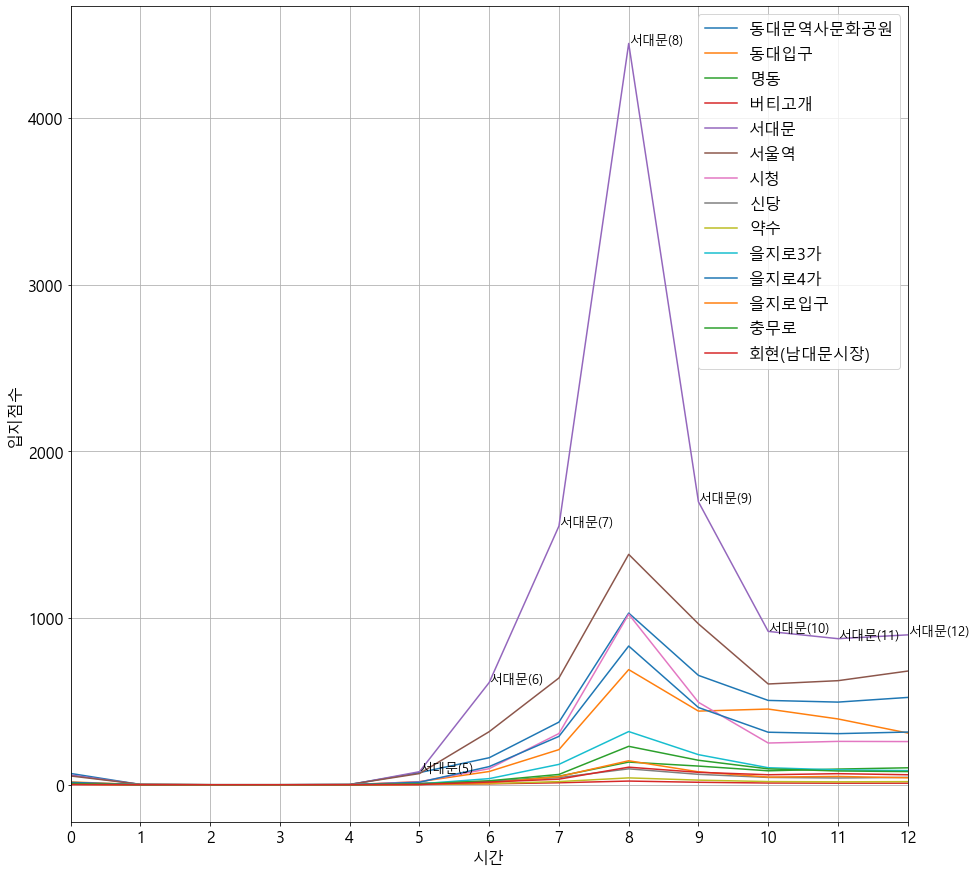

In [170]:
plt.rc('font', family='Malgun Gothic', size =16)
result4.plot(grid=True, figsize=(15,15))
plt.ylabel('입지점수')
for i in range(5, 13):
    TS = list(result['지하철역'][result[i]==result[i].max()])
    plt.text(i, result[i].max(), '{0}({1})'.format(TS[0],i), fontsize='13') # (x좌표, y좌표, 출력텍스트, 사이즈)
plt.xticks(result3['시간']) #x축 눈금 설정

추가로 정규화 해서 해본거

In [96]:


# 기존 파일 정규화
from sklearn import preprocessing # 전처리 함수 불러오기
col = list(range(24)) # 이렇게 3단계로 x에 컬럼 값 저장
x = df3[col].values
x
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float)) # 요거까지 하면 array에 정규화된 값으로 저장됨
df10 = pd.DataFrame(x_scaled, columns = col, index=df3.index) # array를 다시 Dataframe 으로 만들기
df10.to_excel('하차_정규화.xlsx', encoding='euc-kr')

#저장하고 파일에서 지하철역 컬럼 추가

In [98]:
df_no = pd.read_excel('하차_정규화2.xlsx', encoding='euc-kr')
df_no.head()

,지하철역,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,동대문역사문화공원,0.562533,0.268191,0.0,0,0.272727,0.246817,0.242646,0.334701,0.422707,...,0.518477,0.443132,0.383704,0.366929,0.404877,0.657814,0.579165,0.486816,0.508245,0.618212
1,동대입구,0.049641,0.132017,0.0,0,0.090909,0.087360,0.066720,0.104614,0.166029,...,0.163827,0.129587,0.101698,0.104301,0.104333,0.050101,0.033806,0.030448,0.022594,0.027163
2,명동,0.193846,0.171518,0.0,0,0.030303,0.091829,0.156761,0.271940,0.319461,...,0.539053,0.530413,0.478289,0.474797,0.417473,0.394691,0.345610,0.279546,0.214960,0.218935
3,버티고개,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,서대문,0.072169,0.055094,0.0,0,0.030303,0.114428,0.200476,0.268181,0.366598,...,0.145449,0.100061,0.088054,0.100325,0.128358,0.092501,0.076076,0.086539,0.094548,0.081884


In [99]:
col = list(range(24)) # 이렇게 3단계로 x에 컬럼 값 저장
x = dfs2[col].values
x
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float)) # 요거까지 하면 array에 정규화된 값으로 저장됨
dfs10 = pd.DataFrame(x_scaled, columns = col, index=dfs2.index) # array를 다시 Dataframe 으로 만들기
dfs10.to_excel('승차_정규화.xlsx', encoding='euc-kr')

In [120]:
dfs_no = pd.read_excel('승차_정규화2.xlsx', encoding='euc-kr')
dfs_no

,지하철역,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,동대문역사문화공원,1.000000,0.8750,1.0,0,0.473801,0.942228,0.433244,0.189988,0.166345,...,0.530899,0.463115,0.524027,0.478877,0.437789,0.485339,0.508765,0.512203,0.646237,0.796492
1,동대입구,0.089963,0.0625,0.0,0,0.008856,0.034585,0.022849,0.009845,0.006510,...,0.154809,0.128745,0.153645,0.170039,0.118889,0.125219,0.223967,0.179955,0.167577,0.110636
2,명동,0.301352,0.1250,0.0,0,0.031734,0.029756,0.066849,0.024272,0.044170,...,0.462390,0.401322,0.449997,0.377272,0.360940,0.454615,0.580803,0.651725,0.827226,0.671665
3,버티고개,0.000000,0.0000,0.0,0,0.000000,0.000000,0.000000,0.007008,0.003101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,서대문,0.088886,0.0625,0.0,0,0.005904,0.087702,0.158909,0.172468,0.115330,...,0.173804,0.156310,0.213326,0.211589,0.277148,0.151995,0.155763,0.160349,0.152037,0.116586
5,서울역,0.711090,0.5625,0.0,0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,시청,0.328149,0.3125,0.5,0,0.096679,0.113586,0.153630,0.116866,0.080010,...,0.619997,0.531070,0.617068,0.648168,0.856874,0.624604,0.675339,0.694360,0.627971,0.476158
7,신당,0.277426,0.3750,0.0,0,0.103321,0.644712,0.672548,0.432550,0.379181,...,0.280687,0.198017,0.236952,0.188533,0.148257,0.170754,0.188296,0.191621,0.228522,0.244234
8,약수,0.170116,0.2500,0.0,0,0.093727,0.315439,0.404009,0.375934,0.312183,...,0.196040,0.134741,0.152562,0.125350,0.107351,0.121073,0.133708,0.140342,0.147957,0.136573
9,을지로3가,0.645173,1.0000,0.0,0,0.006642,0.035629,0.069359,0.056026,0.057395,...,0.368781,0.293227,0.338280,0.408090,0.496875,0.440675,0.421570,0.447681,0.500919,0.539811


In [36]:
# dfs3 = (dfs2.values)*2

# dfs3 = pd.DataFrame(dfs3)

# dfs4 = (dfs2.values)+(dfs2.values)
# dfs4 = pd.DataFrame(dfs4)
# dfs4.head()

In [54]:
station = pd.read_excel('가게수.xlsx', encoding='euc-kr')
station['가게수']

0      9
1      5
2     24
3     20
4     31
5     52
6      4
7     11
8      3
9     12
10     1
11    63
12    28
13    43
Name: 가게수, dtype: int64

In [62]:
cols = ['개수', '가게수']# 이렇게 3단계로 x에 컬럼 값 저장
y = station[cols].values
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y.astype(float)) # 요거까지 하면 array에 정규화된 값으로 저장됨
station10 = pd.DataFrame(y_scaled, columns = cols, index=station.index) # array를 다시 Dataframe 으로 만들기
station10.to_excel('가게수_정규화.xlsx', encoding='euc-kr')

# y = station['가게수'].values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(y)

In [193]:
station_no = pd.read_excel('가게수_정규화.xlsx', encoding='euc-kr')
station_no

,지하철역,가게수
0,서울역,0.129032
1,동대문역사문화공원,0.064516
2,충무로,0.370968
3,을지로3가,0.306452
4,신당,0.483871
5,약수,0.822581
6,을지로4가,0.048387
7,시청,0.161290
8,동대입구,0.032258
9,버티고개,0.177419


In [108]:
store = pd.merge(df_no, station_no, on='지하철역')

In [123]:
#df_no = df_no.set_index('지하철역')
dfs_no = dfs_no.set_index('지하철역')

In [194]:
result = ((dfs_no.values+1)*3)+((df_no.values+1)*7) # 정규화해서 0부터 1까지라 0인 애도 계산되게 1을 더해서 1~2까지로 
result = pd.DataFrame(result)
result

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,16.937733,14.502339,13.0,10.0,13.330493,14.554402,12.998250,12.912873,13.457982,13.463204,...,15.222039,14.491271,14.258006,14.005134,14.147502,16.060716,15.580450,14.944322,15.496430,16.716962
1,10.617377,11.111616,10.0,10.0,10.662932,10.715273,10.535588,10.761831,11.181732,11.163197,...,11.611216,11.293342,11.172818,11.240225,11.087002,10.726363,10.908544,10.753003,10.660889,10.522048
2,12.260980,11.575624,10.0,10.0,10.307324,10.732071,11.297873,11.976396,12.368737,13.232886,...,15.160540,14.916857,14.698015,14.455393,14.005129,14.126685,14.161681,13.912000,13.986399,13.547538
3,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.021024,10.009302,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4,10.771842,10.573155,10.0,10.0,10.229833,11.064100,11.880055,12.394670,12.912174,11.659904,...,11.539557,11.169359,11.256357,11.337043,11.729952,11.103491,10.999818,11.086816,11.117948,10.922947
5,19.133270,18.687500,10.0,10.0,20.000000,20.000000,20.000000,20.000000,19.679979,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
6,12.117157,12.123571,15.0,10.0,10.926401,13.759596,13.140155,15.058329,17.240030,15.495103,...,15.597787,14.445645,14.175666,13.973925,14.547537,13.216663,13.020182,13.089434,12.981746,12.631996
7,13.980137,11.954522,10.0,10.0,10.522084,13.637063,12.983949,12.453484,12.430902,12.253888,...,12.435690,12.119230,12.224067,12.247654,12.567739,13.166953,12.734761,12.647425,13.292757,14.954036
8,12.815771,16.440229,10.0,10.0,10.917544,11.672939,11.666335,11.854610,11.780021,11.681958,...,11.703805,11.494414,11.658141,11.679171,12.061052,12.039327,11.858411,11.986178,12.348377,12.548698
9,12.745394,13.720374,13.5,10.0,10.232047,11.792104,12.040250,13.555728,14.054315,13.641454,...,13.177293,12.685361,12.722173,12.996434,13.472616,12.945173,12.361171,12.264434,12.454172,12.680438


In [197]:
import math

for i in range(24):
    result[i] = result[i]/(store['가게수']+1)
    for j in range(14):
        if result[i][j] == math.inf: # inf 나오는거 0으로
            result[i][j] = 0
# result.fillna(0) # NaN 은 비교조건으로는 전부 False인듯 그래서 fillna로 NaN을 0으로 채워줌
result

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,231.676764,198.365095,177.815886,136.781451,182.336419,199.077222,177.791950,176.624146,184.080233,184.151657,...,208.209251,198.213713,195.023080,191.564254,193.511590,219.680800,213.111658,204.410606,211.962422,228.657029
1,308.888937,323.267739,290.927734,290.927734,310.214262,311.737009,306.509476,313.091518,325.307592,324.768370,...,337.802482,328.554648,325.048261,327.009334,322.551630,312.059643,317.359794,312.834677,310.154821,306.115554
2,13.663327,12.899584,11.143748,11.143748,11.486223,11.959549,12.590065,13.346195,13.783409,14.746395,...,16.894524,16.622970,16.379098,16.108726,15.606963,15.742422,15.781421,15.503182,15.586091,15.097035
3,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.742603,40.694945,40.657125,...,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,116.326374,113.616186,60.797959,60.797959,121.595918,121.595918,121.595918,121.595918,119.650256,121.595918,...,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918
6,55.707131,55.736619,68.960648,45.973765,50.232778,63.258043,60.410238,69.228808,79.258911,71.236825,...,71.708900,66.412071,65.170874,64.243393,66.880506,60.761976,59.858678,60.177057,59.681976,58.074044
7,13.121684,11.220452,9.385948,9.385948,9.875974,12.799677,12.186667,11.688776,11.667581,11.501436,...,11.672075,11.375047,11.473446,11.495585,11.796015,12.358434,11.952781,11.870808,12.476513,14.035781
8,4.690215,6.016665,3.659721,3.659721,3.995517,4.271970,4.269553,4.338457,4.311159,4.275271,...,4.283266,4.206635,4.266555,4.274251,4.414009,4.406058,4.339848,4.386607,4.519162,4.592474
9,24.367147,26.231153,25.809833,19.118395,19.562032,22.544611,23.019025,25.916377,26.869594,26.080271,...,25.192869,24.252374,24.322753,24.847095,25.757479,24.749094,23.632576,23.447630,23.810378,24.242961


In [149]:
# result[result[4].isin(['inf'])]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [175]:
result.fillna(0)
result

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,107.534855,69.786253,46.500000,0.0,51.622643,70.593231,46.472875,45.149526,53.598724,53.679661,...,80.941597,69.614707,65.999099,62.079576,64.286287,93.941094,86.496977,76.636993,85.194670,104.112907
1,19.138680,34.460109,0.000000,0.0,20.550889,22.173462,16.603229,23.616769,36.633688,36.059116,...,49.947702,40.093610,36.357356,38.446990,33.697054,22.517247,28.164859,23.343090,20.487551,16.183483
2,5.191880,3.618099,0.000000,0.0,0.705707,1.681051,2.980301,4.538392,5.439322,7.423665,...,11.850128,11.290560,10.788035,10.230903,9.196964,9.476091,9.556453,8.983111,9.153953,8.146198
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.118500,0.052431,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,70.782839,67.328125,0.000000,0.0,77.500000,77.500000,77.500000,77.500000,75.019838,77.500000,...,77.500000,77.500000,77.500000,77.500000,77.500000,77.500000,77.500000,77.500000,77.500000,77.500000
6,13.126371,13.166138,31.000000,0.0,5.743683,23.309494,19.468958,31.361639,44.888188,34.069641,...,34.706279,27.563001,25.889129,24.638333,28.194730,19.943310,18.725126,19.154491,18.486828,16.318378
7,8.225616,4.039345,0.000000,0.0,1.078974,7.516596,6.166828,5.070534,5.023865,4.658035,...,5.033760,4.379742,4.596404,4.645153,5.306661,6.545036,5.651839,5.471345,6.805031,10.238342
8,3.423094,7.829298,0.000000,0.0,1.115446,2.033769,2.025741,2.254624,2.163947,2.044733,...,2.071293,1.816738,2.015779,2.041346,2.505593,2.479182,2.259245,2.414570,2.854890,3.098418
9,8.958653,12.140169,11.421053,0.0,0.757207,5.847920,6.657657,11.602903,13.229869,11.882640,...,10.368009,8.762756,8.882881,9.777837,11.331694,9.610565,7.704875,7.389207,8.008351,8.746691


NameError: name 'nan' is not defined

In [201]:
df_no2 = df_no.reset_index()

In [202]:
df_test = df_no2['지하철역']

In [203]:
df_test = pd.DataFrame(df_test)
df_test

,지하철역
0,동대문역사문화공원
1,동대입구
2,명동
3,버티고개
4,서대문
5,서울역
6,시청
7,신당
8,약수
9,을지로3가


In [204]:
df_test = pd.concat([df_test,result], axis=1)
df_test

,지하철역,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,동대문역사문화공원,231.676764,198.365095,177.815886,136.781451,182.336419,199.077222,177.791950,176.624146,184.080233,...,208.209251,198.213713,195.023080,191.564254,193.511590,219.680800,213.111658,204.410606,211.962422,228.657029
1,동대입구,308.888937,323.267739,290.927734,290.927734,310.214262,311.737009,306.509476,313.091518,325.307592,...,337.802482,328.554648,325.048261,327.009334,322.551630,312.059643,317.359794,312.834677,310.154821,306.115554
2,명동,13.663327,12.899584,11.143748,11.143748,11.486223,11.959549,12.590065,13.346195,13.783409,...,16.894524,16.622970,16.379098,16.108726,15.606963,15.742422,15.781421,15.503182,15.586091,15.097035
3,버티고개,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.742603,40.694945,...,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125,40.657125
4,서대문,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,서울역,116.326374,113.616186,60.797959,60.797959,121.595918,121.595918,121.595918,121.595918,119.650256,...,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918,121.595918
6,시청,55.707131,55.736619,68.960648,45.973765,50.232778,63.258043,60.410238,69.228808,79.258911,...,71.708900,66.412071,65.170874,64.243393,66.880506,60.761976,59.858678,60.177057,59.681976,58.074044
7,신당,13.121684,11.220452,9.385948,9.385948,9.875974,12.799677,12.186667,11.688776,11.667581,...,11.672075,11.375047,11.473446,11.495585,11.796015,12.358434,11.952781,11.870808,12.476513,14.035781
8,약수,4.690215,6.016665,3.659721,3.659721,3.995517,4.271970,4.269553,4.338457,4.311159,...,4.283266,4.206635,4.266555,4.274251,4.414009,4.406058,4.339848,4.386607,4.519162,4.592474
9,을지로3가,24.367147,26.231153,25.809833,19.118395,19.562032,22.544611,23.019025,25.916377,26.869594,...,25.192869,24.252374,24.322753,24.847095,25.757479,24.749094,23.632576,23.447630,23.810378,24.242961


In [206]:
df_test2 = df_test.T
df_test2.to_excel('결과.xlsx', encoding='euc-kr')

In [218]:
df_test4 = pd.read_excel('결과2.xlsx', encoding='euc-kr')

In [219]:
df_test4

,시간,동대문역사문화공원,동대입구,명동,버티고개,서대문,서울역,시청,신당,약수,을지로3가,을지로4가,을지로입구,충무로,회현(남대문시장)
0,0,231.676764,308.888937,13.663327,40.657125,0,116.326374,55.707131,13.121684,4.690215,24.367147,203.289863,3.305031,19.929104,5.722615
1,1,198.365095,323.267739,12.899584,40.657125,0,113.616186,55.736619,11.220452,6.016665,26.231153,215.508842,3.905340,16.340848,5.914439
2,2,177.815886,290.927734,11.143748,40.657125,0,60.797959,68.960648,9.385948,3.659721,25.809833,188.029980,4.250000,14.341989,5.246372
3,3,136.781451,290.927734,11.143748,40.657125,0,60.797959,45.973765,9.385948,3.659721,19.118395,188.029980,2.500000,14.341989,5.246372
4,4,182.336419,310.214262,11.486223,40.657125,0,121.595918,50.232778,9.875974,3.995517,19.562032,188.404653,2.565867,15.201289,5.972170
5,5,199.077222,311.737009,11.959549,40.657125,0,121.595918,63.258043,12.799677,4.271970,22.544611,204.360392,2.927114,17.239800,5.612198
6,6,177.791950,306.509476,12.590065,40.657125,0,121.595918,60.410238,12.186667,4.269553,23.019025,208.362635,2.991981,16.760924,6.269871
7,7,176.624146,313.091518,13.346195,40.742603,0,121.595918,69.228808,11.688776,4.338457,25.916377,217.003718,3.627081,17.438341,6.292931
8,8,184.080233,325.307592,13.783409,40.694945,0,119.650256,79.258911,11.667581,4.311159,26.869594,225.264948,3.948320,19.409309,6.709604
9,9,184.151657,324.768370,14.746395,40.657125,0,121.595918,71.236825,11.501436,4.275271,26.080271,221.052715,3.730267,19.428661,6.887964


In [220]:
df_test5 = df_test4.set_index('시간')

([<matplotlib.axis.XTick at 0x29478306048>,
 <a list of 24 Text xticklabel objects>)

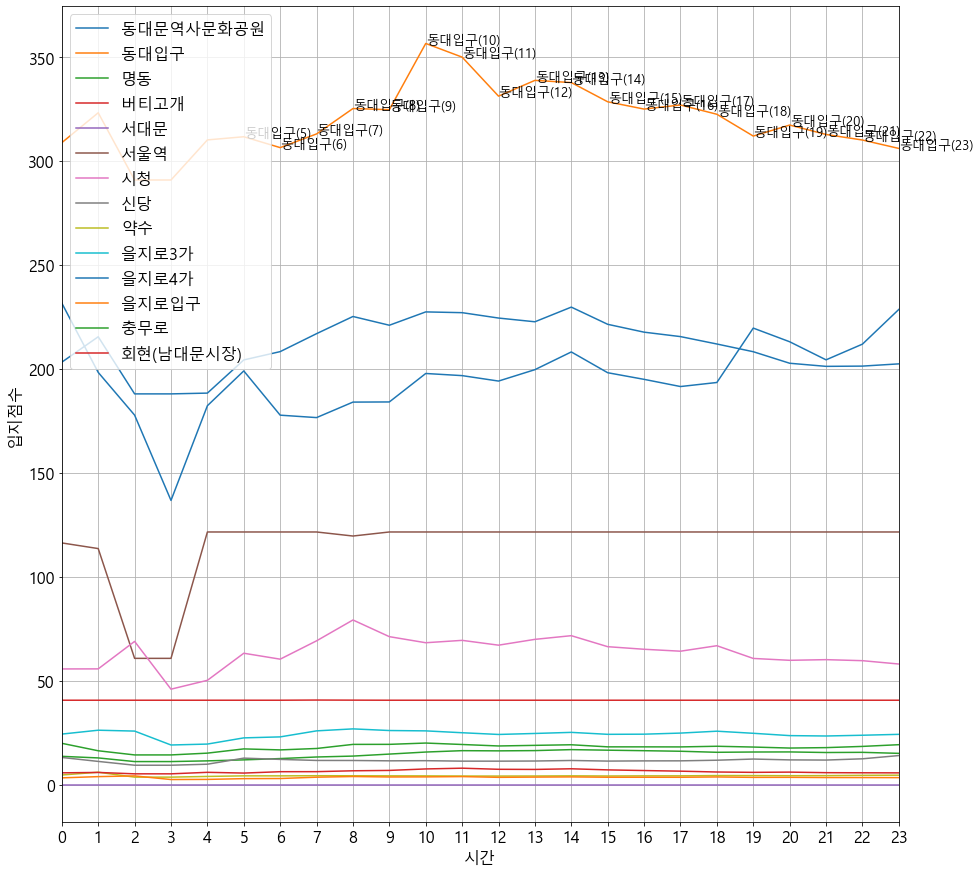

In [222]:
plt.rc('font', family='Malgun Gothic', size =16)
df_test5.plot(grid=True, figsize=(15,15))
plt.ylabel('입지점수')
for i in range(5, 24):
    T = list(df_test['지하철역'][df_test[i]==df_test[i].max()])
    plt.text(i, df_test[i].max(), '{0}({1})'.format(T[0],i), fontsize='13') # (x좌표, y좌표, 출력텍스트, 사이즈)
plt.xticks(df_test4['시간']) #x축 눈금 설정